In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer                       
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [11]:
df_input = pd.read_csv('input/AirlineTweets.csv')
df_input.head()

sent2int = {
    'positive': 2,
    'neutral': 1,
    'negative': 0
}

df_input['int_class'] = df_input['airline_sentiment'].apply(lambda row: sent2int[row])
df_input[['int_class', 'airline_sentiment']].head()

,int_class,airline_sentiment
0,1,neutral
1,2,positive
2,1,neutral
3,0,negative
4,0,negative


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_input['text'], df_input['int_class'], test_size=0.2)
tfidf = TfidfVectorizer(max_features=2000)
tf_X_train = tfidf.fit_transform(X_train).toarray()
tf_X_test = tfidf.transform(X_test).toarray()

In [13]:
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.optimizers import Adam

In [14]:
D = tf_X_train.shape[1]
i = Input(shape=(D,))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [16]:
r = model.fit(
    tf_X_train, y_train,
    validation_data=(tf_X_test, y_test),
    epochs=40,
    batch_size=128
)

Epoch 1/40
92/92 [==============================] - 2s 12ms/step - loss: 0.5665 - accuracy: 0.6499 - val_loss: 0.4674 - val_accuracy: 0.6783
Epoch 2/40
92/92 [==============================] - 1s 7ms/step - loss: 0.3569 - accuracy: 0.6951 - val_loss: 0.3230 - val_accuracy: 0.6977
Epoch 3/40
92/92 [==============================] - 1s 8ms/step - loss: 0.2123 - accuracy: 0.6933 - val_loss: 0.2179 - val_accuracy: 0.6892
Epoch 4/40
92/92 [==============================] - 1s 8ms/step - loss: 0.0981 - accuracy: 0.6924 - val_loss: 0.1313 - val_accuracy: 0.6800
Epoch 5/40
92/92 [==============================] - 1s 8ms/step - loss: 4.4843e-04 - accuracy: 0.6883 - val_loss: 0.0574 - val_accuracy: 0.6745
Epoch 6/40
92/92 [==============================] - 1s 8ms/step - loss: -0.0871 - accuracy: 0.6835 - val_loss: -0.0084 - val_accuracy: 0.6691
Epoch 7/40
92/92 [==============================] - 0s 5ms/step - loss: -0.1683 - accuracy: 0.6789 - val_loss: -0.0710 - val_accuracy: 0.6691
Epoch 8/40


In [42]:
# pretty bad accuracy, but unlike udemy, i did positive, neutral, and negative comments.
# do i get anything better with just positive and negative comments?

posneg2int = {
    'positive': 1,
    'negative': 0,
}

df_copy = df_input[df_input['airline_sentiment'] != 'neutral']
df_copy['int_class'] = df_copy['airline_sentiment'].apply(lambda row: posneg2int[row])

df_posneg = df_copy[['int_class', 'text']].copy()
df_posneg.head()

/var/folders/1m/277y_gln0711zs7jdjfr_rr80000gn/T/ipykernel_69881/3099549544.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['int_class'] = df_copy['airline_sentiment'].apply(lambda row: posneg2int[row])


,int_class,text
1,1,@VirginAmerica plus you've added commercials t...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
5,0,@VirginAmerica seriously would pay $30 a fligh...
6,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_posneg['text'], df_posneg['int_class'])
tfidf = TfidfVectorizer(max_features=2000)

tf_X_train = tfidf.fit_transform(X_train)
tf_X_train = tf_X_train.toarray()

tf_X_test = tfidf.transform(X_test)
tf_X_test = tf_X_test.toarray()

D = tf_X_train.shape[1]
i = Input(shape=(D,))
x = Dense(1)(i)

model = Model(i, x)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

r = model.fit(
    tf_X_train, y_train,
    validation_data=(tf_X_test, y_test),
    epochs=40,
    batch_size=128
)

Epoch 1/10
68/68 [==============================] - 1s 9ms/step - loss: 0.4997 - accuracy: 0.7957 - val_loss: 0.4106 - val_accuracy: 0.7938
Epoch 2/10
68/68 [==============================] - 0s 6ms/step - loss: 0.3714 - accuracy: 0.8006 - val_loss: 0.3532 - val_accuracy: 0.8067
Epoch 3/10
68/68 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8208 - val_loss: 0.3156 - val_accuracy: 0.8319
Epoch 4/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.8470 - val_loss: 0.2895 - val_accuracy: 0.8514
Epoch 5/10
68/68 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.8679 - val_loss: 0.2703 - val_accuracy: 0.8676
Epoch 6/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.8802 - val_loss: 0.2558 - val_accuracy: 0.8798
Epoch 7/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.8925 - val_loss: 0.2446 - val_accuracy: 0.8912
Epoch 8/10
68/68 [==

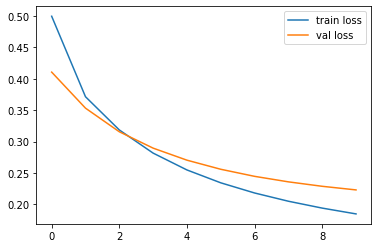

In [46]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

In [ ]:
# answer: data can only be labeled with 0s or 1s it seems 
# for this type of tf model